In [ ]:
# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!gdown https://disk.yandex.ru/d/j4exohUxebQNtA

Downloading...
From: https://disk.yandex.ru/d/j4exohUxebQNtA
To: /content/j4exohUxebQNtA
9.32kB [00:00, 410kB/s]


In [ ]:
!pip install git+https://github.com/ai-collab-incubator/downloader@0.1.3

  Cloning https://github.com/ai-collab-incubator/downloader (to revision 0.1.3) to /tmp/pip-req-build-oso9gsvu
  Running command git clone --filter=blob:none --quiet https://github.com/ai-collab-incubator/downloader /tmp/pip-req-build-oso9gsvu
  Resolved https://github.com/ai-collab-incubator/downloader to commit 39268a59dfe0d13220e941983b82994ce8907cdd
  Preparing metadata (setup.py) ... done
  Created wheel for downloader: filename=downloader-0.1.3-py3-none-any.whl size=3263 sha256=0233697d6c0db2a9fe797e522cf2f39bebf2a4e61ca4614b1dbd89ca4451b9bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-_eij85dz/wheels/43/89/e8/cc0736243490fe4a441bcb2f0505574d3a172f24e4ea5c4929
Successfully built downloader


In [ ]:
CFG_URL = "https://disk.yandex.ru/d/rHKVlgsRSAka5Q"

In [ ]:
from downloader import YandexDownloader
ya_downloader = YandexDownloader()
video_file, orig_filename = ya_downloader.download(CFG_URL, "all_videos")
orig_filename

2.34GB [03:42, 10.6MB/s]


'AI Karate.zip'

In [ ]:
!unzip all_videos.zip -d all_videos

Archive:  all_videos.zip
  inflating: all_videos/AI Karate/cam4.part1.rar  
  inflating: all_videos/AI Karate/cam4.part2.rar  
  inflating: all_videos/AI Karate/cam4.part3.rar  
  inflating: all_videos/AI Karate/cam4.part4.rar  


In [ ]:
password = "aikarate"
!unrar  x -p{password}  "all_videos/AI Karate/cam4.part1.rar"




UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from all_videos/AI Karate/cam4.part1.rar

Extracting  cam4.mp4                                                       0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31%

Extracting from all_videos/AI Karate/cam4.part2.rar

...         cam4.mp4                                                      32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62%

Extracting from all_videos/AI Karate/cam4.part3.rar

...         cam4.mp4                                                      63% 64% 65% 66% 6

In [ ]:
#Копирование файла:
!cp /content/cam4.mp4 /content/drive/MyDrive/Karate_2/

In [ ]:
#Копирование папки:
!cp -r /content/калибровка /content/drive/MyDrive/Karate_2/

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import os
from IPython.display import display, HTML, clear_output
import base64
import numpy as np
from google.colab import output
import json
import asyncio
import time
import nest_asyncio
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

In [ ]:
#@title Сохранение кадра видео - сцены

import cv2
import os

# Список видео
video_1 = '/content/drive/My Drive/Karate_2/cam1.mp4'
video_2 = '/content/drive/My Drive/Karate_2/cam2.mp4'
video_3 = '/content/drive/My Drive/Karate_2/cam3.mp4'
video_4 = '/content/drive/My Drive/Karate_2/cam4.mp4'
video_list = [video_1, video_2, video_3, video_4]

# Время в секундах для каждого видео
time_frame = {
    'cam1.mp4': 530,
    'cam2.mp4': 620,
    'cam3.mp4': 0,
    'cam4.mp4': 0
}

# Функция для сохранения кадра из видео
def save_frame_from_video(video_path, time_in_seconds, output_dir):
    # Извлекаем имя файла без пути
    video_name = os.path.basename(video_path)
    # Создаем путь для сохранения кадра
    frame_filename = os.path.join(output_dir, f"frame_{video_name.split('.')[0]}_at_{time_in_seconds}s.jpg")

    # Открываем видеофайл
    cap = cv2.VideoCapture(video_path)

    # Получаем FPS видео
    fps = cap.get(cv2.CAP_PROP_FPS)
    if fps == 0:
        print(f"Ошибка: Не удалось получить FPS для видео {video_name}.")
        return

    # Вычисляем номер кадра, соответствующий заданному времени
    frame_number = int(time_in_seconds * fps)

    # Устанавливаем позицию видео на нужный кадр
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Читаем кадр
    ret, frame = cap.read()
    if not ret:
        print(f"Ошибка: Не удалось прочитать кадр для видео {video_name} на времени {time_in_seconds} сек.")
        cap.release()
        return

    # Сохраняем кадр
    cv2.imwrite(frame_filename, frame)
    print(f"Кадр для видео {video_name} на времени {time_in_seconds} сек. успешно сохранен как {frame_filename}")

    # Освобождаем ресурсы
    cap.release()

# Папка для сохранения кадров
output_directory = '/content/drive/My Drive/Karate_2/frames'
os.makedirs(output_directory, exist_ok=True)  # Создаем папку, если она не существует

# Проходим по списку видео и сохраняем кадры
for video in video_list:
    # Извлекаем имя файла
    video_name = os.path.basename(video)
    # Получаем время для данного видео
    if video_name in time_frame:
        time_in_seconds = time_frame[video_name]
        # Сохраняем кадр
        save_frame_from_video(video, time_in_seconds, output_directory)
    else:
        print(f"Внимание: Для видео {video_name} не указано время для сохранения кадра.")

Кадр для видео cam1.mp4 на времени 530 сек. успешно сохранен как /content/drive/My Drive/Karate_2/frames/frame_cam1_at_530s.jpg
Кадр для видео cam2.mp4 на времени 620 сек. успешно сохранен как /content/drive/My Drive/Karate_2/frames/frame_cam2_at_620s.jpg
Ошибка: Не удалось получить FPS для видео cam3.mp4.
Ошибка: Не удалось получить FPS для видео cam4.mp4.


In [ ]:
# Функция для сохранения калибровочных данных в YAML
def save_calibration_to_yaml(ret, mtx, dist, rvecs, tvecs, file_name):
    cv_file = cv2.FileStorage(file_name, cv2.FILE_STORAGE_WRITE)
    cv_file.write("reprojection_error", ret)
    cv_file.write("camera_matrix", mtx)
    cv_file.write("distortion_coefficients", dist)
    cv_file.release()

# Функция для удаления дублирующихся точек
def remove_duplicates(objpoints, imgpoints):
    unique_objpoints = []
    unique_imgpoints = []
    seen = set()

    for obj, img in zip(objpoints, imgpoints):
        obj_tuple = tuple(obj.flatten())  # Преобразуем массив в кортеж для сравнения
        if obj_tuple not in seen:
            seen.add(obj_tuple)
            unique_objpoints.append(obj)
            unique_imgpoints.append(img)

    return unique_objpoints, unique_imgpoints

# Функция для обработки одного видео
def calibrate_camera(video_path, step=10):  # step — шаг выборки кадров
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Получаем общее количество кадров

    objpoints = []  # 3D points in real world space
    imgpoints = []  # 2D points in image plane
    missing_frames = []  # Список для хранения номеров кадров, где доска не найдена

    for frame_num in tqdm(range(0, frame_count, step), desc=f"Processing {video_path}"):  # Используем шаг
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)  # Устанавливаем текущий кадр
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Находим углы шахматной доски
        ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

        if ret:
            objpoints.append(objp)
            corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
            imgpoints.append(corners2)
        else:
            missing_frames.append(frame_num)  # Записываем номер кадра, где доска не найдена

    cap.release()

    # Выводим информацию о пропущенных кадрах
    if missing_frames:
        print(f"Кадры, где не была обнаружена шахматная доска: {missing_frames}")
    else:
        print("Шахматная доска была обнаружена на всех кадрах.")

    return objpoints, imgpoints, gray.shape[::-1]

In [ ]:
#@title Внутренняя калибровка
# Исходяшее видео
video_1 = '/content/drive/MyDrive/Karate_2/калибровка/cam1.mp4'
video_2 = '/content/drive/MyDrive/Karate_2/калибровка/cam2.mp4'
video_3 = '/content/drive/MyDrive/Karate_2/калибровка/cam3.mp4'
video_4 = '/content/drive/MyDrive/Karate_2/калибровка/cam4.mp4'
video_list =[video_1, video_2, video_3, video_4]

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from tqdm.notebook import tqdm  # Для отображения прогресс-бара

# Параметры шахматной доски
chessboard_size = (4, 7)  # Количество углов на шахматной доске (width, height)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Создаем массив реальных точек (world coordinates) для шахматной доски
objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)

# Функция для сохранения калибровочных данных в YAML
def save_calibration_to_yaml(ret, mtx, dist, rvecs, tvecs, file_name):
    cv_file = cv2.FileStorage(file_name, cv2.FILE_STORAGE_WRITE)
    cv_file.write("reprojection_error", ret)
    cv_file.write("camera_matrix", mtx)
    cv_file.write("distortion_coefficients", dist)
    cv_file.release()

# Функция для удаления дублирующихся точек
def remove_duplicates(objpoints, imgpoints):
    unique_objpoints = []
    unique_imgpoints = []
    seen = set()

    for obj, img in zip(objpoints, imgpoints):
        obj_tuple = tuple(obj.flatten())  # Преобразуем массив в кортеж для сравнения
        if obj_tuple not in seen:
            seen.add(obj_tuple)
            unique_objpoints.append(obj)
            unique_imgpoints.append(img)

    return unique_objpoints, unique_imgpoints

# Функция для обработки одного видео
def calibrate_camera(video_path, step=10):  # step — шаг выборки кадров
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Получаем общее количество кадров

    objpoints = []  # 3D points in real world space
    imgpoints = []  # 2D points in image plane
    missing_frames = []  # Список для хранения номеров кадров, где доска не найдена

    for frame_num in tqdm(range(0, frame_count, step), desc=f"Processing {video_path}"):  # Используем шаг
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)  # Устанавливаем текущий кадр
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Находим углы шахматной доски
        ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

        if ret:
            objpoints.append(objp)
            corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
            imgpoints.append(corners2)
        else:
            missing_frames.append(frame_num)  # Записываем номер кадра, где доска не найдена

    cap.release()

    # Выводим информацию о пропущенных кадрах
    if missing_frames:
        print(f"Кадры, где не была обнаружена шахматная доска: {missing_frames}")
    else:
        print("Шахматная доска была обнаружена на всех кадрах.")

    return objpoints, imgpoints, gray.shape[::-1]

# Обработка всех видео
all_objpoints = []
all_imgpoints = []
image_shape = None
camera_errors = []  # Список для хранения ошибок по каждой камере

for i, video in enumerate(video_list):
    # После сбора точек для камеры
    objpoints, imgpoints, shape = calibrate_camera(video)
    objpoints, imgpoints = remove_duplicates(objpoints, imgpoints)

    # Проверяем, что есть хотя бы одна пара objpoints/imgpoints
    if len(objpoints) == 0 or len(imgpoints) == 0:
        print(f"Предупреждение: Для камеры {i+1} не найдено ни одной шахматной доски. Калибровка пропущена.")
        continue

    # Выполняем калибровку для текущей камеры
    try:
          ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, shape, None, None)
          # Сохраняем калибровочные данные в YAML
          yaml_file = f'calibration_camera_{i+1}.yaml'
          save_calibration_to_yaml(ret, mtx, dist, rvecs, tvecs, yaml_file)
    except Exception as e:
          print(f"Ошибка калибровки камеры {i+1}: {e}")
          continue

    print (f'Средняя ошибка повторной проекции (в пикселях) {i+1}: {ret:.4f}')

    # Вывод результатов
    print(f"\nМатрица внутренних параметров камеры {i+1}:")
    print(mtx)
    print(f"\nКоэффициенты искажения камеры {i+1}:")
    print(dist)


Processing /content/drive/MyDrive/Karate_2/калибровка/cam1.mp4:   0%|          | 0/103 [00:00<?, ?it/s]

Шахматная доска была обнаружена на всех кадрах.
Средняя ошибка повторной проекции (в пикселях) 1: 0.1468

Матрица внутренних параметров камеры 1:
[[2.51383283e+03 0.00000000e+00 1.31337399e+03]
 [0.00000000e+00 2.49071320e+03 5.08048986e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Коэффициенты искажения камеры 1:
[[ 4.78934978e-01  5.76955632e+00 -5.87764053e-03  4.05717282e-02
  -7.84471007e+01]]


Processing /content/drive/MyDrive/Karate_2/калибровка/cam2.mp4:   0%|          | 0/115 [00:00<?, ?it/s]

Кадры, где не была обнаружена шахматная доска: [30, 40, 60, 70, 80, 410, 470, 600]
Средняя ошибка повторной проекции (в пикселях) 2: 0.2629

Матрица внутренних параметров камеры 2:
[[310.99589573   0.         999.6601404 ]
 [  0.         318.97344002 538.82636416]
 [  0.           0.           1.        ]]

Коэффициенты искажения камеры 2:
[[-0.00720106  0.00112891  0.00084263 -0.00053584 -0.00011182]]


Processing /content/drive/MyDrive/Karate_2/калибровка/cam3.mp4:   0%|          | 0/110 [00:00<?, ?it/s]

Шахматная доска была обнаружена на всех кадрах.
Средняя ошибка повторной проекции (в пикселях) 3: 0.0911

Матрица внутренних параметров камеры 3:
[[2.51878976e+03 0.00000000e+00 1.08548575e+03]
 [0.00000000e+00 2.50721644e+03 5.47674933e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Коэффициенты искажения камеры 3:
[[ 2.13204690e-01 -3.80116441e-01  3.11225881e-04  4.71316699e-03
  -2.39162019e+00]]


Processing /content/drive/MyDrive/Karate_2/калибровка/cam4.mp4:   0%|          | 0/85 [00:00<?, ?it/s]

Кадры, где не была обнаружена шахматная доска: [430, 500]
Средняя ошибка повторной проекции (в пикселях) 4: 0.2071

Матрица внутренних параметров камеры 4:
[[1.33421977e+03 0.00000000e+00 9.92940940e+02]
 [0.00000000e+00 1.33111698e+03 5.48896195e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Коэффициенты искажения камеры 4:
[[-2.94448256e-02  8.96096431e-01  1.07542936e-03 -3.36732650e-03
  -2.85529189e+00]]


# Внутренняя калибровка камер

https://drive.google.com/drive/folders/1bX9zsg1LDGZV9CvUOpFeUwy-XdKWI-K2?usp=sharing

In [ ]:
#@title Реализация на JavaScript внешней калибровки - ДЛЯ ТЕСТИРОВАНИЯ....
# Глобальная переменная для хранения изображений
image_buffer = []

# Функция для отображения всех накопленных изображений
def display_all_images():
    for img in image_buffer:
        plt.figure(figsize=(16, 12))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()


nest_asyncio.apply()  # Применяем patch для вложения циклов событий


# Асинхронная функция для завершения отметки точек
async def get_coords(timeout=120):
    """
    Функция для получения координат точек с таймаутом.
    """
    start_time = time.time()
    while True:
        elapsed_time = time.time() - start_time
        if elapsed_time > timeout:
            print("Время ожидания истекло. Прерывание процесса...")
            return None

        json_coords = output.eval_js('window.colab_coords || null')
        if json_coords is not None:
            coords = np.array(json.loads(json_coords))  # Преобразуем JSON в массив NumPy
            clear_output()
            print(f"Отмечено {len(coords)} точек на изображении.")
            print(coords)
            return coords
        await asyncio.sleep(0.1)  # Асинхронное ожидание

# Обертка для вызова асинхронной функции
def run_get_coords():
    import asyncio
    loop = asyncio.get_event_loop()  # Получаем текущий event loop
    try:
        return loop.run_until_complete(get_coords())  # Выполняем асинхронную задачу
    except KeyboardInterrupt:
        print("Прервано пользователем.")
        return None

# Функция для отображения изображения и получения координат
def imgp_objp_visualizer_clicker_js(img):
    """
    Функция для получения координат точек на изображении с использованием canvas и JavaScript.
    """
    # Конвертируем изображение в формат base64 для отображения в HTML
    _, img_encoded = cv2.imencode('.jpg', img)
    img_base64 = base64.b64encode(img_encoded).decode('utf-8')

    # Создаем HTML-код с canvas
    display(HTML(f'''
        <h3>Кликните на изображении для отметки точек.</h3>
        <canvas id="canvas" style="border:1px solid #000000;"></canvas>
        <button id="finishButton">Finish</button>  <!-- Кнопка всегда активна -->
        <p>Отмеченные точки:</p>
        <ul id="coordsList"></ul>
        <script>
            // Глобальные переменные
            var coords = [];
            var finishButton = document.getElementById('finishButton');
            var coordsList = document.getElementById('coordsList');

            // Создаем холст и загружаем изображение
            var img = new Image();
            img.src = 'data:image/jpeg;base64,{img_base64}';
            img.onload = function() {{
                var canvas = document.getElementById('canvas');
                canvas.width = img.width;
                canvas.height = img.height;
                var ctx = canvas.getContext('2d');
                ctx.drawImage(img, 0, 0);

                // Обработка кликов
                canvas.onclick = function(event) {{
                    var rect = canvas.getBoundingClientRect();
                    var x = event.clientX - rect.left;
                    var y = event.clientY - rect.top;

                    // Сохраняем координаты
                    coords.push([x, y]);
                    google.colab.kernel.invokeFunction('notebook.handle_click', [x, y], {{}});

                    // Отмечаем точку красным кругом
                    ctx.beginPath();
                    ctx.arc(x, y, 5, 0, 2 * Math.PI);
                    ctx.fillStyle = 'red';
                    ctx.fill();

                    // Обновляем список координат
                    var li = document.createElement('li');
                    li.textContent = '(' + x + ', ' + y + ')';
                    coordsList.appendChild(li);
                }};

                // Кнопка завершения
                finishButton.addEventListener('click', function() {{
                    if (coords.length === 0) {{
                        alert("Необходимо отметить хотя бы одну точку!");
                        return;
                    }}
                    console.log("Кнопка 'Finish' нажата. Отправка координат:", coords);
                    window.colab_coords = JSON.stringify(coords);  // Сохраняем координаты в глобальную переменную
                }});
            }};
        </script>
    '''))

    # Возвращаем функцию для получения координат
    return run_get_coords

# Функция для сохранения калибровочных данных в YAML
def save_calibration_to_yaml(calib_dir, cam_name, reprojection_error, R, T, file_name=None):
    """
    Сохраняет калибровочные данные (включая внешние параметры) для конкретной камеры в YAML-файл.

    :param calib_dir: Директория для сохранения файла.
    :param cam_name: Имя камеры.
    :param reprojection_error: Ошибка повторной проекции.
    :param file_name: Необязательное имя файла (если None, используется стандартное имя).
    """
    if file_name is None:
        file_name = os.path.join(calib_dir, 'extrinsics', f'calibration_{cam_name}_extrinsics.yaml')

    # Создаем объект FileStorage для записи данных
    cv_file = cv2.FileStorage(file_name, cv2.FILE_STORAGE_WRITE)

    # Записываем данные
    cv_file.write("camera_name", cam_name)
    cv_file.write("reprojection_error", reprojection_error)
    cv_file.write("rotation_matrix", R)
    cv_file.write("translation_vector", T)

    # Закрываем файл
    cv_file.release()

    print(f"Калибровочные данные для камеры {cam_name} успешно сохранены в {file_name}")

# Функция для чтения внутренних параметров камеры из YAML
def load_intrinsics_opencv(calib_dir, cam):
    yaml_file = os.path.join(calib_dir, 'intrinsics', f'calibration_{cam}.yaml')

    if not os.path.exists(yaml_file):
        print(f"Файл внутренних параметров {yaml_file} не найден.")
        return None, None
    else:  print(f"Файл внутренних параметров {yaml_file} найден.")
    print (yaml_file)
    cv_file = cv2.FileStorage(yaml_file, cv2.FILE_STORAGE_READ)

    if cv_file.isOpened():
        # Читаем данные
        ret = cv_file.getNode("reprojection_error").real()  # Средняя ошибка повторной проекции

        K = cv_file.getNode("camera_matrix").mat()  # Средняя ошибка повторной проекции
        D = cv_file.getNode("distortion_coefficients").mat()  # Матрица внутренних параметров

        print (K, D)
        #fs.release()
        return K, D
    else:
        print(f"Ошибка при открытии файла {yaml_file}.")
        return None, None

# Основная функция для калибровки внешних параметров
def calibrate_extrinsics(calib_dir, extrinsics_config_dict):
    try:
        extrinsics_cam_listdirs_names = next(os.walk(os.path.join(calib_dir, 'extrinsics')))[1]
        print (extrinsics_cam_listdirs_names)
    except StopIteration:
        print(f"Ошибка: Папка {os.path.join(calib_dir, 'extrinsics')} не найдена.")
        return [], [], []

    extrinsics_method = extrinsics_config_dict.get('extrinsics_method')
    if extrinsics_method != 'scene':
        print('Ошибка: В данном примере поддерживается только метод "scene".')
        return [], [], []

    object_coords_3d = np.array(extrinsics_config_dict['scene']['object_coords_3d'], np.float32)
    extrinsics_extension = extrinsics_config_dict['scene']['extrinsics_extension']
    show_reprojection_error = extrinsics_config_dict['scene']['show_reprojection_error']

    # Количество точек 3D
    pcs_points = len(object_coords_3d)

    R, T, reprojection_errors = [], [], []  # Список для хранения ошибок повторной проекции

    for i, cam in enumerate(extrinsics_cam_listdirs_names):
        print(f'\nОбработка камеры {cam}:')

        # Загрузка внутренних параметров камеры
        K, D = load_intrinsics_opencv(calib_dir, cam)
        if K is None or D is None:
            print(f"Пропуск камеры {cam} из-за отсутствия или некорректных внутренних параметров.")
            continue

        # Читаем первое изображение для камеры
        img_files = sorted([
            f for f in os.listdir(os.path.join(calib_dir, 'extrinsics', cam))
            if f.endswith(extrinsics_extension)
        ])
        if not img_files:
            print(f"Для камеры {cam} не найдено изображений. Пропуск...")
            continue

        img_path = os.path.join(calib_dir, 'extrinsics', cam, img_files[0])
        img = cv2.imread(img_path)
        if img is None:
            print(f"Не удалось прочитать изображение: {img_path}. Пропуск...")
            continue
        print(f"Использование изображения: {img_path}")

        # Отображение графика расположения точек object_coords_3d
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(
            object_coords_3d[:, 0],  # Координата X
            object_coords_3d[:, 1],  # Координата Y
            object_coords_3d[:, 2],  # Координата Z
            c='r', marker='o'
        )

        # Добавление нумерации точек
        for j, point in enumerate(object_coords_3d):
            ax.text(point[0], point[1], point[2], str(j), color="blue", fontsize=10)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('Расположение точек object_coords_3d')
        plt.show()

        # Нахождение углов вручную (используем JavaScript-версию)
        get_coords_func = imgp_objp_visualizer_clicker_js(img)

        # Ожидаем результатов от JavaScript
        coords = get_coords_func()
        print(coords)

        if len(coords) < pcs_points:
            print(f'Для калибровки необходимо отметить {pcs_points} точек. Пропуск...')
            continue

        # Преобразуем координаты в формат NumPy
        imgp = np.array(coords, dtype=np.float32)
        objp = object_coords_3d

        # Вычисление внешних параметров
        try:
            _, rvec, tvec = cv2.solvePnP(objp, imgp, K, D)
            R_mat = cv2.Rodrigues(rvec)[0]  # Преобразование Rodrigues в матрицу поворота
            T_vec = tvec.flatten()

            R.append(R_mat)
            T.append(T_vec)

            # Проверка результатов калибровки
            if show_reprojection_error:
                proj_points, _ = cv2.projectPoints(objp, rvec, tvec, K, D)

                # Создаем копию изображения для отображения точек
                img_with_points = img.copy()

                # Рисуем предсказанные точки (зеленый цвет)
                proj_points = proj_points.squeeze().astype(np.int32)
                for point in proj_points:
                    cv2.circle(img_with_points, tuple(point), 5, (0, 255, 0), -1)  # Зеленые круги

                # Рисуем отмеченные точки (красный цвет)
                imgp_int = imgp.astype(np.int32)
                for point in imgp_int:
                    cv2.circle(img_with_points, tuple(point), 5, (0, 0, 255), -1)  # Красные круги

                # Сохраняем изображение в буфер
                image_buffer.append(img_with_points)
                print(f"Проекция и отмеченные точки для камеры {cam} успешно нанесены на изображение.")

                # Вычисляем ошибку повторной проекции
                reprojection_error = np.mean(np.linalg.norm(imgp.squeeze() - proj_points, axis=1))
                reprojection_errors.append(reprojection_error)  # Добавляем ошибку в список
                print(f"Ошибка повторной проекции для камеры {cam}: {reprojection_error:.4f} пикселей")

                # Сохраняем параметры калибровки в YAML
                save_calibration_to_yaml(calib_dir, cam, reprojection_error, R_mat, T_vec)

            else:
                reprojection_errors.append(None)  # Если не показываем ошибку, добавляем None

            print(f"Внешние параметры для камеры {cam} успешно вычислены.")

        except Exception as e:
            print(f"Ошибка при вычислении внешних параметров для камеры {cam}: {e}")
            reprojection_errors.append(None)  # В случае ошибки добавляем None

    # Отображаем все сохраненные изображения
    display_all_images()

    return R, T, reprojection_errors

Отмечено 8 точек на изображении.
[[ 787.       558.90625]
 [1105.       651.90625]
 [1185.       600.90625]
 [ 872.       525.90625]
 [ 781.       442.90625]
 [1144.       512.90625]
 [1197.       484.90625]
 [ 848.       423.90625]]
[[ 787.       558.90625]
 [1105.       651.90625]
 [1185.       600.90625]
 [ 872.       525.90625]
 [ 781.       442.90625]
 [1144.       512.90625]
 [1197.       484.90625]
 [ 848.       423.90625]]
Проекция и отмеченные точки для камеры cam2 успешно нанесены на изображение.
Ошибка повторной проекции для камеры cam2: 25.0942 пикселей
Калибровочные данные для камеры cam2 успешно сохранены в /content/drive/MyDrive/Karate_2/extrinsics/calibration_cam2_extrinsics.yaml
Внешние параметры для камеры cam2 успешно вычислены.


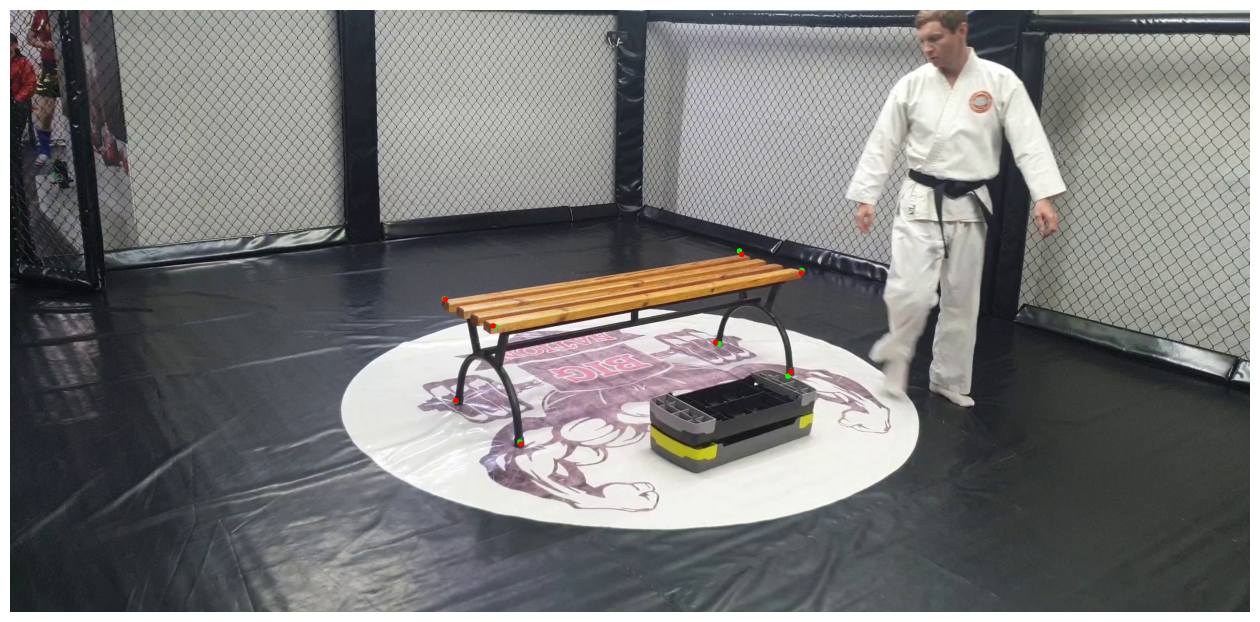

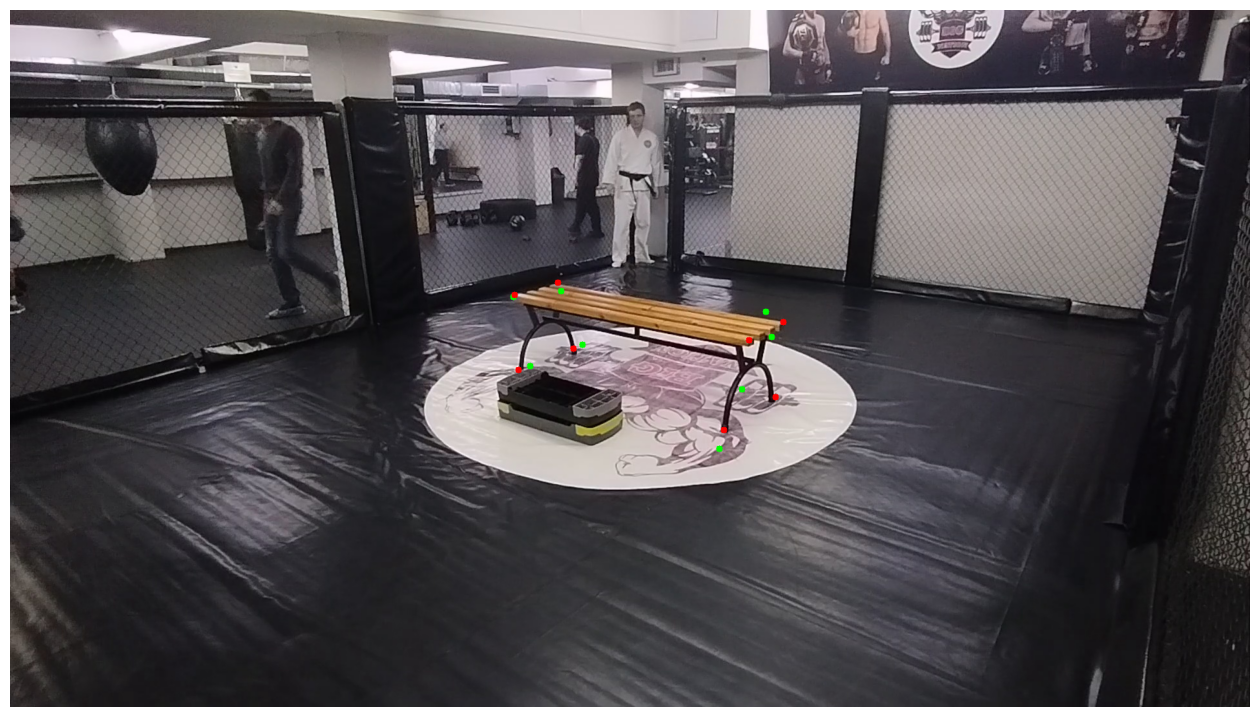

Внешние параметры успешно рассчитаны:

Камера 1:
Матрица поворота:
 [[ 0.76074843 -0.64549614  0.06779797]
 [-0.14522732 -0.27109912 -0.9515326 ]
 [ 0.63259059  0.71403082 -0.29998191]]
Вектор перемещения:
 [-0.89850284  0.60396279  5.64604036]
Ошибка повторной проекции для камеры: 4.5406 пикселей

Камера 2:
Матрица поворота:
 [[ 0.853744    0.52067813 -0.00393315]
 [ 0.21617938 -0.36131604 -0.90703759]
 [-0.47369575  0.77352764 -0.42103128]]
Вектор перемещения:
 [-0.97124913  0.06574378  1.55210608]
Ошибка повторной проекции для камеры: 25.0942 пикселей


In [ ]:
#@title Запуск внешней калибровки - ошибочная нумерация камер

# Настройки
calib_dir = '/content/drive/MyDrive/Karate_2'

# Конфигурация для метода scene
extrinsics_config_dict = {
    'extrinsics_method': 'scene',
    'scene': {
        'object_coords_3d': [
            [0, 0, 0], [1.46, 0, 0], [1.46, 0.51, 0], [0, 0.51, 0],
            [-0.09, 0.06, 0.49], [1.55, 0.06, 0.49], [1.5, 0.45, 0.49], [-0.09, 0.45, 0.49]
        ],  # Задайте координаты объектов в метрах
        'extrinsics_extension': 'jpg',  # Расширение файлов с изображениями
        'show_reprojection_error': True  # Показывать ли ошибку повторной проекции
    }
}

# Подсчет количества 3D точек
pcs_points = len(extrinsics_config_dict['scene']['object_coords_3d'])

# Вывод результата
print(f"Количество отмеченных 3D точек: {pcs_points}")

print("Начало процесса калибровки внешних параметров...")
R, T, reprojection_errors = calibrate_extrinsics(calib_dir, extrinsics_config_dict)

if R and T and reprojection_errors:
    print("Внешние параметры успешно рассчитаны:")
    for i, (r, t, re) in enumerate(zip(R, T, reprojection_errors)):
        print(f"\nКамера {i+1}:")
        print("Матрица поворота:\n", r)
        print("Вектор перемещения:\n", t)
        if re is not None:
            print(f"Ошибка повторной проекции для камеры: {re:.4f} пикселей")
        else:
            print("Ошибка повторной проекции не рассчитана.")
else:
    print("Не удалось рассчитать корректные внешние параметры.")

# Внешняя калибровка

https://drive.google.com/drive/folders/1w3OYDwSqPxFoIplQZMidtqTwSnZiqNCm?usp=sharing

Отмечено 8 точек на изображении.
[[ 788.        558.546875]
 [1103.        649.546875]
 [1186.        597.546875]
 [ 878.        528.546875]
 [ 783.        444.546875]
 [1144.        512.546875]
 [1196.        483.546875]
 [ 847.        422.546875]]
[[ 788.        558.546875]
 [1103.        649.546875]
 [1186.        597.546875]
 [ 878.        528.546875]
 [ 783.        444.546875]
 [1144.        512.546875]
 [1196.        483.546875]
 [ 847.        422.546875]]
Проекция и отмеченные точки для камеры cam2 успешно нанесены на изображение.
Ошибка повторной проекции для камеры cam2: 6.6446 пикселей
Калибровочные данные для камеры cam2 успешно сохранены в /content/drive/MyDrive/Karate_2/test/extrinsics/calibration_cam2_extrinsics.yaml
Внешние параметры для камеры cam2 успешно вычислены.


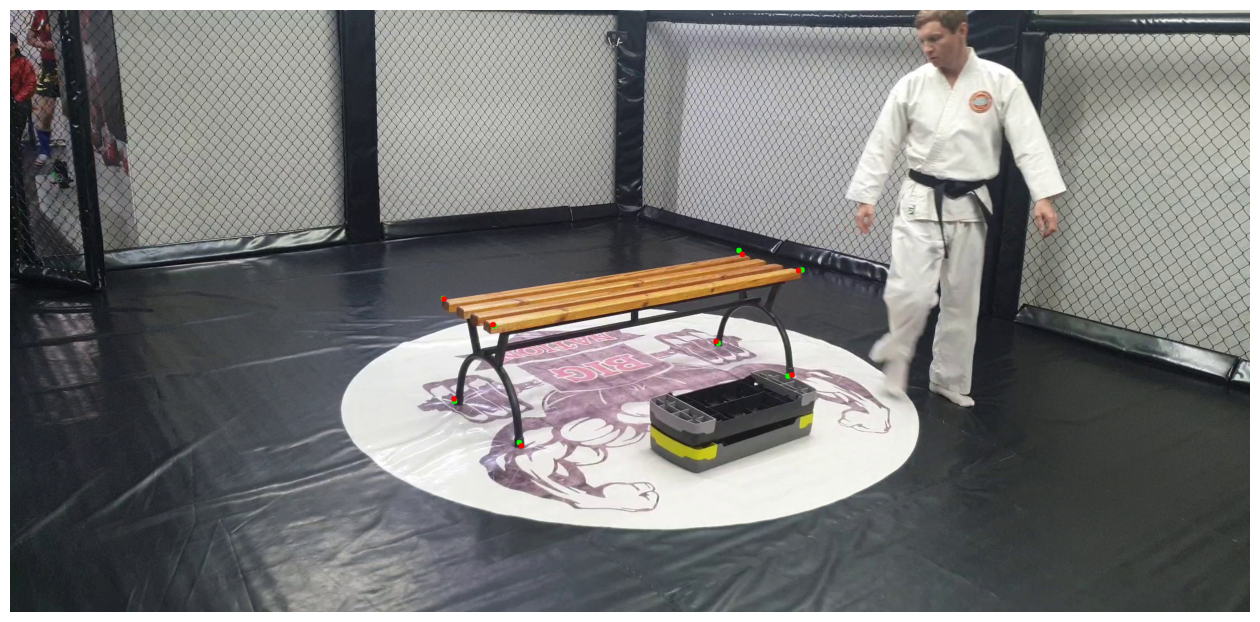

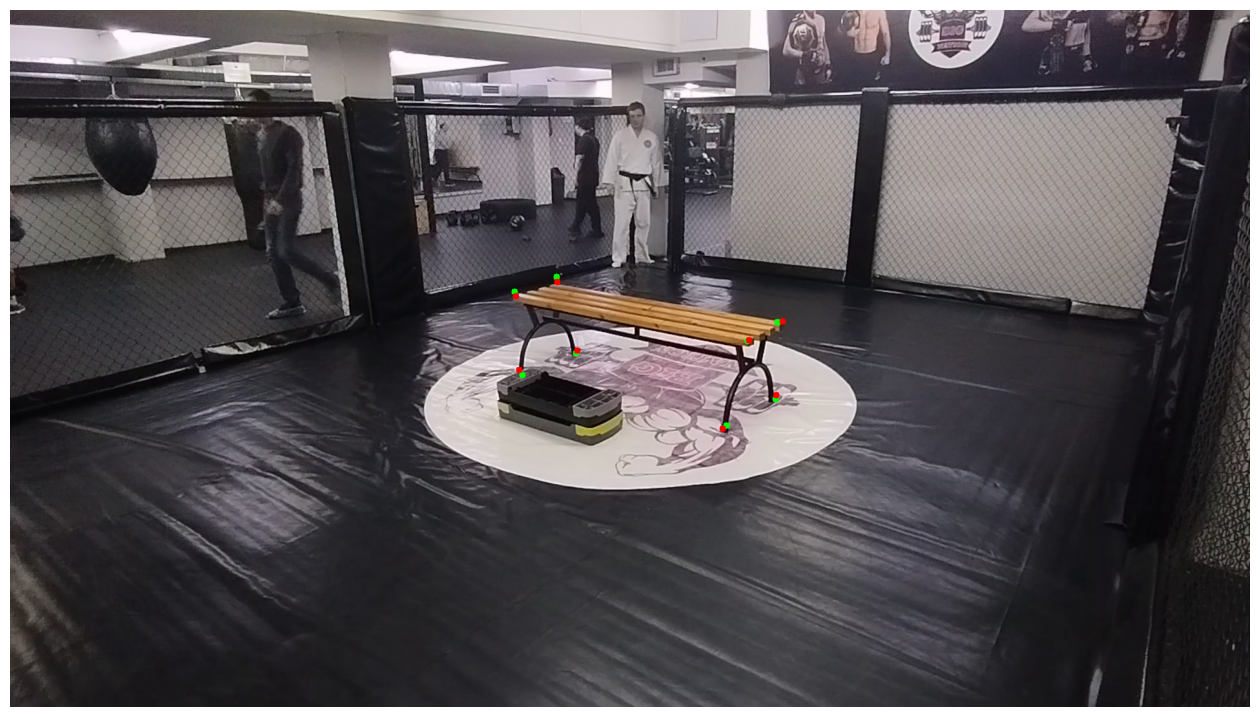

Внешние параметры успешно рассчитаны:

Камера 1:
Матрица поворота:
 [[ 0.75754899 -0.648954    0.07055659]
 [-0.14436103 -0.27195983 -0.95141881]
 [ 0.6366156   0.71056073 -0.29970656]]
Вектор перемещения:
 [-0.89418848  0.60114231  5.61038148]
Ошибка повторной проекции для камеры: 5.3948 пикселей

Камера 2:
Матрица поворота:
 [[ 0.82832221  0.5602177   0.00620068]
 [ 0.18573802 -0.26415166 -0.94642764]
 [-0.52856759  0.78509874 -0.32285642]]
Вектор перемещения:
 [-1.12361108  0.0730794   9.70895689]
Ошибка повторной проекции для камеры: 6.6446 пикселей


In [ ]:
# Запуск калибровки - перебор калибровки

# Настройки
calib_dir = '/content/drive/MyDrive/Karate_2/test'

# Конфигурация для метода scene
extrinsics_config_dict = {
    'extrinsics_method': 'scene',
    'scene': {
        'object_coords_3d': [
            [0, 0, 0], [1.46, 0, 0], [1.46, 0.51, 0], [0, 0.51, 0],
            [-0.09, 0.06, 0.49], [1.55, 0.06, 0.49], [1.5, 0.45, 0.49], [-0.09, 0.45, 0.49]
        ],  # Задайте координаты объектов в метрах
        'extrinsics_extension': 'jpg',  # Расширение файлов с изображениями
        'show_reprojection_error': True  # Показывать ли ошибку повторной проекции
    }
}

# Подсчет количества 3D точек
pcs_points = len(extrinsics_config_dict['scene']['object_coords_3d'])

# Вывод результата
print(f"Количество отмеченных 3D точек: {pcs_points}")

print("Начало процесса калибровки внешних параметров...")
R, T, reprojection_errors = calibrate_extrinsics(calib_dir, extrinsics_config_dict)

if R and T and reprojection_errors:
    print("Внешние параметры успешно рассчитаны:")
    for i, (r, t, re) in enumerate(zip(R, T, reprojection_errors)):
        print(f"\nКамера {i+1}:")
        print("Матрица поворота:\n", r)
        print("Вектор перемещения:\n", t)
        if re is not None:
            print(f"Ошибка повторной проекции для камеры: {re:.4f} пикселей")
        else:
            print("Ошибка повторной проекции не рассчитана.")
else:
    print("Не удалось рассчитать корректные внешние параметры.")